In [74]:
#Import Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
# Read both CSV file using Pandas
df1 = pd.read_csv("playlist1.csv")
df2 = pd.read_csv("playlist2.csv")

In [76]:
# Print the shape of 
print("The shape for Playlist1 is:",df1.shape)
print("The shape for Playlist2 is:",df2.shape)


The shape for Playlist1 is: (214, 19)
The shape for Playlist2 is: (200, 19)


In [77]:
print(df1.dtypes)
print("------------------------------\n",df2.dtypes)

album                object
artists              object
disc_number           int64
duration_ms           int64
episode                bool
explicit               bool
external_ids         object
external_urls        object
href                 object
id                   object
is_local               bool
name                 object
popularity            int64
preview_url          object
track                  bool
track_number          int64
type                 object
uri                  object
available_markets    object
dtype: object
------------------------------
 album                object
artists              object
disc_number           int64
duration_ms           int64
episode                bool
explicit               bool
external_ids         object
external_urls        object
href                 object
id                   object
is_local               bool
name                 object
popularity            int64
preview_url          object
track                  bool
tr

In [78]:
df1.isna().sum()

album                  0
artists                0
disc_number            0
duration_ms            0
episode                0
explicit               0
external_ids           0
external_urls          0
href                   0
id                     0
is_local               0
name                   0
popularity             0
preview_url           60
track                  0
track_number           0
type                   0
uri                    0
available_markets    154
dtype: int64

# Data Cleaning
- Remove any columns not necessary for the analysis questions below.
- Change datatypes, rename, and reorder columns as you see fit.
- Transform the duration_ms column from milliseconds to minutes:seconds.
- Should the artists column be transformed? Explain your choice and follow through.


In [79]:
df1=df1.loc[:,['album','artists','duration_ms','explicit','name','popularity','preview_url']]
df2=df2.loc[:,['album','artists','duration_ms','explicit','name','popularity','preview_url']]

In [80]:
df1.rename(columns = {"name":'song_name'}, inplace = True)
df2.rename(columns = {"name":'song_name'}, inplace = True)

In [81]:
df1.dtypes

album          object
artists        object
duration_ms     int64
explicit         bool
song_name      object
popularity      int64
preview_url    object
dtype: object

In [82]:
# Delete all the duplicate data in both dataframe
playlist1=df1.drop_duplicates()
playlist2=df2.drop_duplicates()


In [83]:
print(playlist1.shape)
print(playlist2.shape)

(183, 7)
(155, 7)


In [84]:
# Convert duration_ms column from Milliseconds to Minutes:Seconds Format in both Playlist
from datetime import timedelta

playlist1['song_duration'] = pd.to_datetime(playlist1['duration_ms'],unit='ms').dt.strftime('%M:%S')
playlist2['song_duration'] = pd.to_datetime(playlist2['duration_ms'],unit='ms').dt.strftime('%M:%S')

<ipython-input-84-e595ebb3f18e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist1['song_duration'] = pd.to_datetime(playlist1['duration_ms'],unit='ms').dt.strftime('%M:%S')
<ipython-input-84-e595ebb3f18e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist2['song_duration'] = pd.to_datetime(playlist2['duration_ms'],unit='ms').dt.strftime('%M:%S')


In [85]:
# Convert duration_ms column from milliseconds to minutes for analysis and save it in new column as duration_min for both Playlist 

playlist1['duration_ms'] = pd.to_timedelta(playlist1['duration_ms'],unit='ms')
playlist1['duration_min'] = playlist1['duration_ms'] / np.timedelta64(1, 'm')

playlist2['duration_ms'] = pd.to_timedelta(playlist2['duration_ms'],unit='ms')
playlist2['duration_min'] = playlist2['duration_ms'] / np.timedelta64(1, 'm')


<ipython-input-85-558bcf4f78fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist1['duration_ms'] = pd.to_timedelta(playlist1['duration_ms'],unit='ms')
<ipython-input-85-558bcf4f78fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist1['duration_min'] = playlist1['duration_ms'] / np.timedelta64(1, 'm')
<ipython-input-85-558bcf4f78fb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [86]:
# convet the datatypes of explicit column from Bool to Integer in both Playlists

playlist1["explicit"] = playlist1["explicit"].astype(int)
playlist2["explicit"] = playlist2["explicit"].astype(int)

<ipython-input-86-66cf8750569e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist1["explicit"] = playlist1["explicit"].astype(int)
<ipython-input-86-66cf8750569e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist2["explicit"] = playlist2["explicit"].astype(int)


In [87]:
# Count the value of 0 and 1 in Explicit column for playlist1
playlist1.explicit.value_counts()

0    151
1     32
Name: explicit, dtype: int64

In [88]:
## Count the value of 0 and 1 in Explicit column for playlist2
playlist2.explicit.value_counts()

0    81
1    74
Name: explicit, dtype: int64

In [89]:
playlist1.dtypes

album                     object
artists                   object
duration_ms      timedelta64[ns]
explicit                   int64
song_name                 object
popularity                 int64
preview_url               object
song_duration             object
duration_min             float64
dtype: object

In [90]:
playlist2.dtypes

album                     object
artists                   object
duration_ms      timedelta64[ns]
explicit                   int64
song_name                 object
popularity                 int64
preview_url               object
song_duration             object
duration_min             float64
dtype: object

# Extraction to SQL database table guidelines:
- Songs from both CSVs should be placed in the same database table.
- No duplicate songs should be placed in the database. Duplicate songs exist within both CSVs.
- Only songs with a not-null preview_url should be placed in the database.

In [91]:
#Songs from both CSVs should be placed in the same database table.

data = pd.concat([playlist1, playlist2], axis=0).drop_duplicates()
data

,album,artists,duration_ms,explicit,song_name,popularity,preview_url,song_duration,duration_min
0,Sylvan Esso,['Sylvan Esso'],0 days 00:03:20.160000,0,Hey Mami,54,https://p.scdn.co/mp3-preview/4241c4c411e58c9f...,03:20,3.336000
1,Skin,['Dijon'],0 days 00:03:50.625000,0,Skin,66,https://p.scdn.co/mp3-preview/b8dac2ff6f7f80e4...,03:50,3.843750
2,Life Of A Ghost,['Blue Foundation'],0 days 00:05:02.826000,0,Eyes on Fire,66,https://p.scdn.co/mp3-preview/aba14d8764b6ec60...,05:02,5.047100
3,Can't Hide,"['Whethan', 'Ashe']",0 days 00:03:04,0,Can't Hide,53,https://p.scdn.co/mp3-preview/254f252350f32fdf...,03:04,3.066667
4,Sylvan Esso,['Sylvan Esso'],0 days 00:04:28.213000,0,Coffee,61,https://p.scdn.co/mp3-preview/f3888e1ddd1fb009...,04:28,4.470217
...,...,...,...,...,...,...,...,...,...
194,Mozambique (feat. Jaykae & Moonchild Sanelly),"['Ghetts', 'Jaykae', 'Moonchild Sanelly']",0 days 00:04:09.680000,1,Mozambique (feat. Jaykae & Moonchild Sanelly) ...,42,https://p.scdn.co/mp3-preview/85e90aa70ce51688...,04:09,4.161333
195,CHERISH,['Jay Prince'],0 days 00:03:32.866000,1,In The Morning,46,https://p.scdn.co/mp3-preview/080be708338808cf...,03:32,3.547767
196,Dark Days (feat. Kojey Radical),"['Che Lingo', 'Kojey Radical']",0 days 00:03:02.640000,1,Dark Days (feat. Kojey Radical),0,NaN,03:02,3.044000
197,Yesterday,['Loyle Carner'],0 days 00:02:48.654000,0,Yesterday,59,https://p.scdn.co/mp3-preview/29a0727f9f380643...,02:48,2.810900


In [92]:
#Only songs with a not-null preview_url should be placed in the database.

data = data.dropna(subset=['preview_url']).sort_values("song_duration")
data

,album,artists,duration_ms,explicit,song_name,popularity,preview_url,song_duration,duration_min
79,Seduce (Feat. Capella Grey & Tamae),"['Russ', 'Tamae', 'Capella Grey']",0 days 00:01:57.446000,1,Seduce (Feat. Capella Grey & Tamae),68,https://p.scdn.co/mp3-preview/3f40171410e7541b...,01:57,1.957433
46,Six Speed,['Current Blue'],0 days 00:02:00,1,Six Speed,51,https://p.scdn.co/mp3-preview/2f1a7dfcb55349f8...,02:00,2.000000
160,Acid Rap,"['Chance the Rapper', 'Nate Fox']",0 days 00:02:19.406000,1,Pusha Man,50,https://p.scdn.co/mp3-preview/639e68b866f42cfc...,02:19,2.323433
186,Limbo,['Aminé'],0 days 00:02:23.152000,1,Woodlawn,59,https://p.scdn.co/mp3-preview/1415304ec768705c...,02:23,2.385867
30,Billy's Home,['808INK'],0 days 00:02:23.925000,1,Suede Jaw,53,https://p.scdn.co/mp3-preview/c1c98dbbe77567f6...,02:23,2.398750
...,...,...,...,...,...,...,...,...,...
127,Jesus Piece (Deluxe),"['The Game', 'Elijah Blake']",0 days 00:05:46.880000,1,Freedom,30,https://p.scdn.co/mp3-preview/1d47f9914d69205a...,05:46,5.781333
31,Port of Miami 2,"['Rick Ross', 'Drake']",0 days 00:05:49.600000,1,Gold Roses (feat. Drake),63,https://p.scdn.co/mp3-preview/cdd6f85499387685...,05:49,5.826667
96,We're All Alone In This Together,['Dave'],0 days 00:07:03.909000,1,In The Fire,63,https://p.scdn.co/mp3-preview/542852e9574b0f90...,07:03,7.065150
81,Man O To,['Nu'],0 days 00:09:40.406000,0,Man O To - Original Mix,55,https://p.scdn.co/mp3-preview/546f3317e451400b...,09:40,9.673433


In [93]:
# Checking nulls 
data.isna().sum()

album            0
artists          0
duration_ms      0
explicit         0
song_name        0
popularity       0
preview_url      0
song_duration    0
duration_min     0
dtype: int64

In [94]:
# Extract the duplicate song_name from Dataframe
duplicate_record = pd.concat(g for _, g in data.groupby("song_name") if len(g) > 1)
duplicate_record

,album,artists,duration_ms,explicit,song_name,popularity,preview_url,song_duration,duration_min
190,The Story of Us (Deluxe),"['Quinn XCII', 'Chelsea Cutler']",0 days 00:04:00.013000,0,Flare Guns,37,https://p.scdn.co/mp3-preview/38119f890a052c5f...,04:00,4.000217
62,The Story of Us,"['Quinn XCII', 'Chelsea Cutler']",0 days 00:04:00.013000,0,Flare Guns,61,https://p.scdn.co/mp3-preview/38119f890a052c5f...,04:00,4.000217
188,The Story of Us (Deluxe),['Quinn XCII'],0 days 00:03:26.533000,0,Straightjacket,36,https://p.scdn.co/mp3-preview/4d751c1a0ea2a78e...,03:26,3.442217
140,The Story of Us,['Quinn XCII'],0 days 00:03:26.533000,0,Straightjacket,61,https://p.scdn.co/mp3-preview/4d751c1a0ea2a78e...,03:26,3.442217
113,Vossi Bop,['Stormzy'],0 days 00:03:16.266000,1,Vossi Bop,62,https://p.scdn.co/mp3-preview/18394a60948ec519...,03:16,3.271100
82,Heavy Is The Head,['Stormzy'],0 days 00:03:16.266000,1,Vossi Bop,69,https://p.scdn.co/mp3-preview/18394a60948ec519...,03:16,3.271100


In [95]:
# Delete duplicate songs from Dataframe
data = data.drop_duplicates(subset = ['song_name'])

In [96]:
data

,album,artists,duration_ms,explicit,song_name,popularity,preview_url,song_duration,duration_min
79,Seduce (Feat. Capella Grey & Tamae),"['Russ', 'Tamae', 'Capella Grey']",0 days 00:01:57.446000,1,Seduce (Feat. Capella Grey & Tamae),68,https://p.scdn.co/mp3-preview/3f40171410e7541b...,01:57,1.957433
46,Six Speed,['Current Blue'],0 days 00:02:00,1,Six Speed,51,https://p.scdn.co/mp3-preview/2f1a7dfcb55349f8...,02:00,2.000000
160,Acid Rap,"['Chance the Rapper', 'Nate Fox']",0 days 00:02:19.406000,1,Pusha Man,50,https://p.scdn.co/mp3-preview/639e68b866f42cfc...,02:19,2.323433
186,Limbo,['Aminé'],0 days 00:02:23.152000,1,Woodlawn,59,https://p.scdn.co/mp3-preview/1415304ec768705c...,02:23,2.385867
30,Billy's Home,['808INK'],0 days 00:02:23.925000,1,Suede Jaw,53,https://p.scdn.co/mp3-preview/c1c98dbbe77567f6...,02:23,2.398750
...,...,...,...,...,...,...,...,...,...
127,Jesus Piece (Deluxe),"['The Game', 'Elijah Blake']",0 days 00:05:46.880000,1,Freedom,30,https://p.scdn.co/mp3-preview/1d47f9914d69205a...,05:46,5.781333
31,Port of Miami 2,"['Rick Ross', 'Drake']",0 days 00:05:49.600000,1,Gold Roses (feat. Drake),63,https://p.scdn.co/mp3-preview/cdd6f85499387685...,05:49,5.826667
96,We're All Alone In This Together,['Dave'],0 days 00:07:03.909000,1,In The Fire,63,https://p.scdn.co/mp3-preview/542852e9574b0f90...,07:03,7.065150
81,Man O To,['Nu'],0 days 00:09:40.406000,0,Man O To - Original Mix,55,https://p.scdn.co/mp3-preview/546f3317e451400b...,09:40,9.673433


# Analysis and visualization questions:
- What song has the longest runtime?
- Create a visualization of song runtime.
- What is the average runtime of songs in each playlist?
- Which playlist has a longer total runtime?
- Which playlist contains more popular music?
- Create a visualization of song popularity.
- Which playlist contains more duplicate songs?
- Which song is present the most times across both playlists?
- Which artist has the most songs in each playlist?
- Create a visualization of songs per artist for each playlist.
- Which artist has the most songs from different albums across both playlists?
- Create a visualization depicting which playlist contains a greater percentage of explicit music.
- Create a visualization for the preview_url column.

In [97]:
#What song has the longest runtime?

Longest_runtime = data['song_duration'].max()         # Calculate Longest duration Across both playlist
print("The Longest runtime for song is: ", Longest_runtime)

song = data.loc[data['song_duration'] == Longest_runtime,'song_name']  # extract the song name by song duration
print(song)

The Longest runtime for song is:  11:39
29    Ocean
Name: song_name, dtype: object


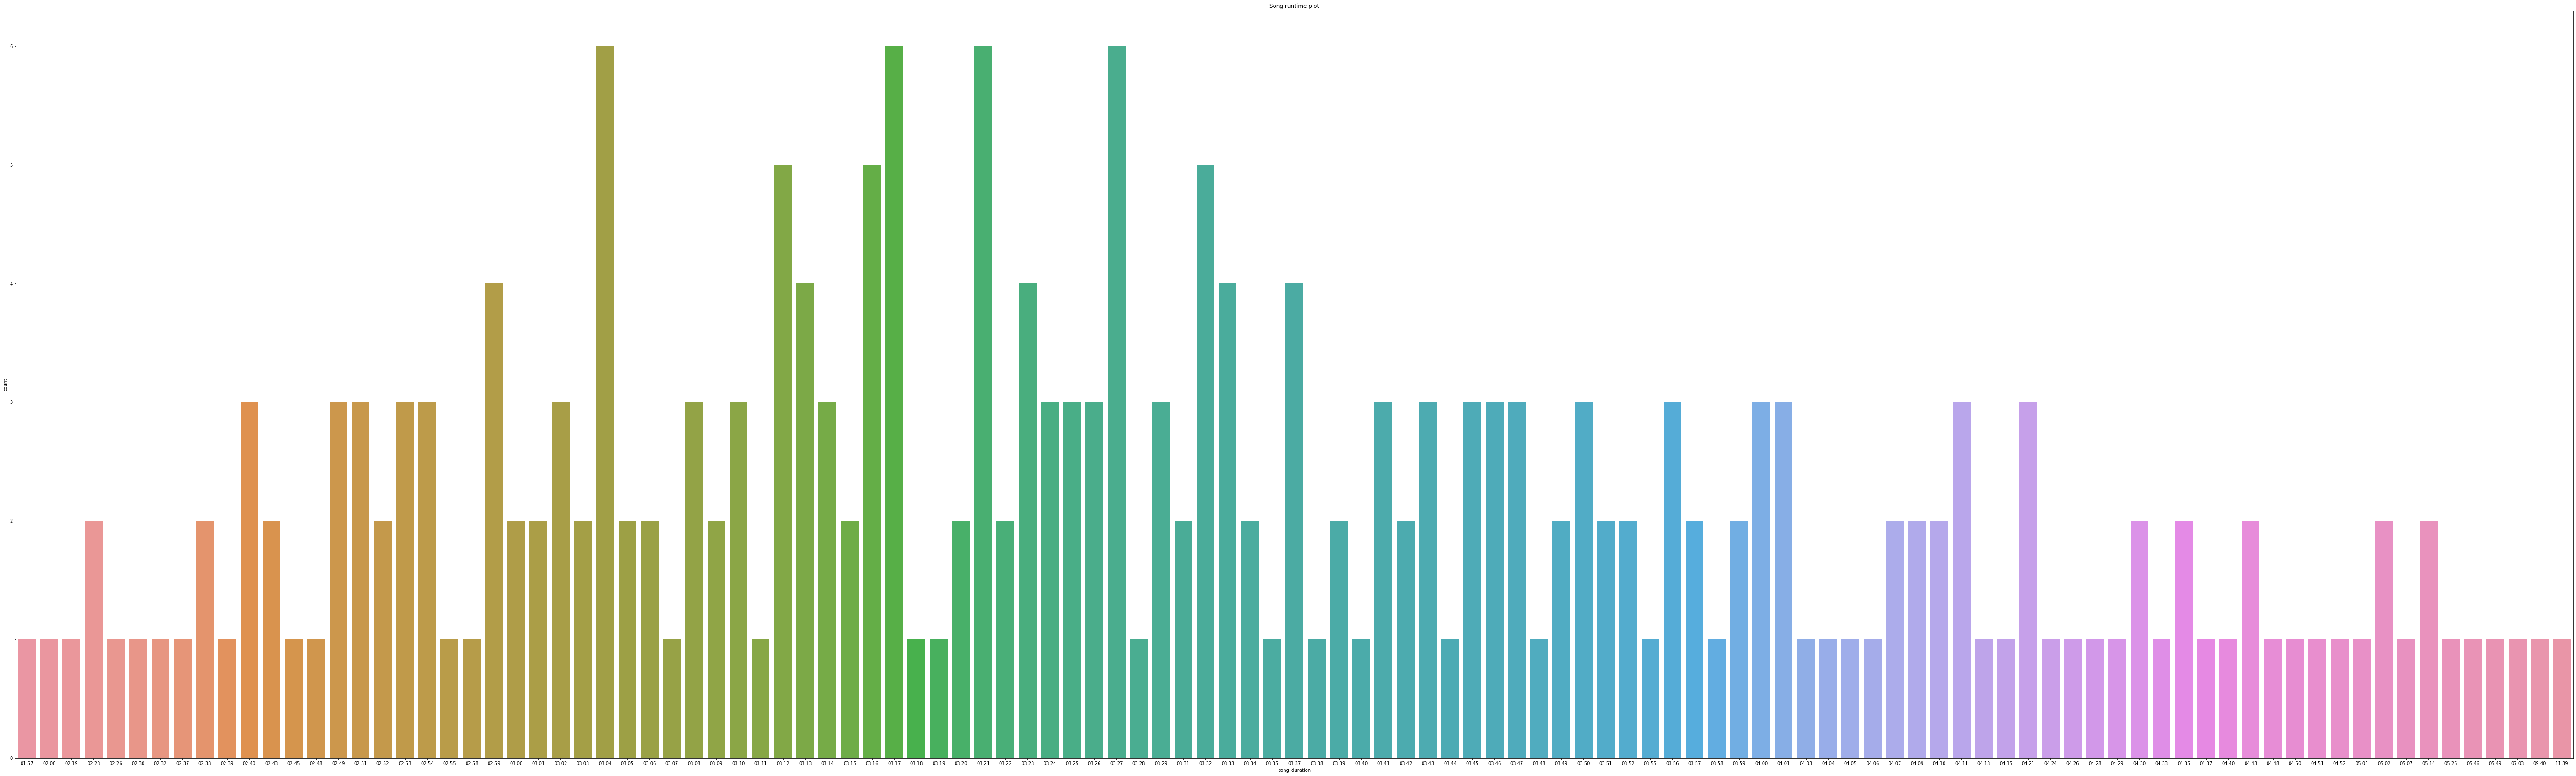

In [98]:
# Create a visualization of song runtime.

ax = plt.figure(figsize = (100,30))
ax = sns.countplot(data = data,  x ='song_duration')
#plt.xticks(rotation=90)
ax.set_title('Song runtime plot')
#ax.set_xlabel('song duration')
#ax.set_ylabel('Count')
plt.show();

In [99]:
#What is the average runtime of songs in each playlist?

Avg_runtime_df1 = pd.to_numeric(playlist1["duration_min"],  downcast='float').mean() # Calculate mean of song_duration in playlist1 
print("the average runtime of songs in playlist1 is: ",Avg_runtime_df1)
Avg_runtime_df2 = pd.to_numeric(playlist2["duration_min"],  downcast='float').mean() # Calculate mean of song_duration in playlist1 
print("the average runtime of songs in playlist2 is: ",Avg_runtime_df2)

the average runtime of songs in playlist1 is:  3.6213791370391846
the average runtime of songs in playlist2 is:  3.5817859172821045


In [100]:
#Which playlist has a longer total runtime?
    
Longest_runtime_df1 = playlist1['song_duration'].max()  # extract highest song runtime from both playlists and compare it
Longest_runtime_df2 = playlist2['song_duration'].max()
if Longest_runtime_df1 > Longest_runtime_df2:                       
    print("Playlist1 has a longer runtime: ",Longest_runtime_df1)
else:
    print("Playlist2 has a longer runtime: ",Longest_runtime_df2)
    


Playlist1 has a longer runtime:  11:39


In [101]:
playlist1.popularity.value_counts()   # count the Popularity for playlist1

0     35
56     9
61     8
51     6
57     5
      ..
83     1
26     1
14     1
65     1
35     1
Name: popularity, Length: 63, dtype: int64

In [102]:
playlist2.popularity.value_counts()   # count the Popularity for playlist1

59    10
0      8
49     8
57     7
55     7
62     6
61     5
54     5
41     5
73     5
51     4
46     4
65     4
52     4
70     4
63     4
69     4
66     4
56     4
53     4
50     3
44     3
42     3
68     3
75     3
82     2
30     2
64     2
35     2
39     2
36     2
43     2
47     2
72     2
60     2
16     1
85     1
29     1
81     1
37     1
38     1
40     1
48     1
76     1
45     1
74     1
58     1
79     1
15     1
Name: popularity, dtype: int64

In [103]:
#playlist1['rank'] = range(1, len(playlist1)+1)
#unique_artists = playlist1[['artists', 'album', 'rank', 'popularity']].drop_duplicates(subset=['artists'], keep='first')
#unique_artists


In [104]:
#Which playlist contains more popular music?

popularity_df1 = playlist1['popularity'].max()      
popularity_df2 = playlist2['popularity'].max()

if popularity_df1 > popularity_df2:                     # Compare Popularity from both Playlist
    print("Playlist1 contains more popular music: ",popularity_df1)     # print highest popularity
else:
    print("Playlist2 contains more popular music: ",popularity_df2)
    

Playlist1 contains more popular music:  86


/Users/hinalpatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


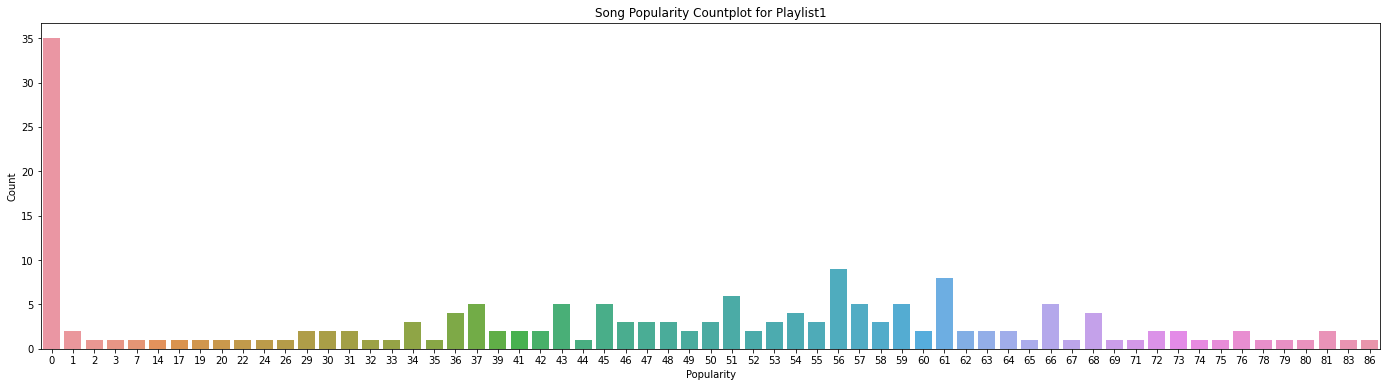

/Users/hinalpatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


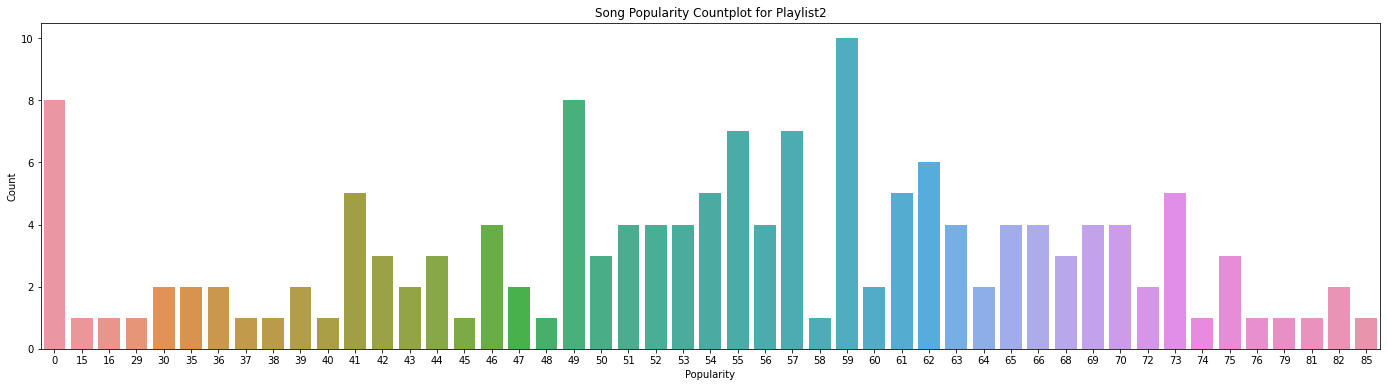

In [105]:
#Create a visualization of song popularity.

ax = plt.figure(figsize = (24, 6))
ax = sns.countplot(playlist1['popularity'])
ax.set_title('Song Popularity Countplot for Playlist1')
ax.set_xlabel('Popularity')
ax.set_ylabel('Count')
plt.show();


ax = plt.figure(figsize = (24, 6))
ax = sns.countplot(playlist2['popularity'])
ax.set_title('Song Popularity Countplot for Playlist2')
ax.set_xlabel('Popularity')
ax.set_ylabel('Count')
plt.show();


In [106]:
#Which playlist contains more duplicate songs?


duplicate_record_df1 = len(df1[df1["song_name"].isin(df1["song_name"][df1["song_name"].duplicated()])].sort_values("song_name"))

duplicate_record_df2 = len(pd.concat(g for _, g in df2.groupby("song_name") if len(g) > 1))  # Used groupby to extract duplicate record

if duplicate_record_df1 > duplicate_record_df2:          # compare from both Playlists
    print("playlist1 contains more duplicate songs of ",duplicate_record_df1)
else: 
    print("playlist2 contains more duplicate songs of ",duplicate_record_df2)
    

playlist2 contains more duplicate songs of  96


In [107]:
#Which song is present the most times across both playlists?

df = pd.concat([playlist1, playlist2], axis=0).sort_values("song_name")
most_song = df["song_name"].value_counts()     # Count the each song from both playlists

In [108]:
# Extract the most time present song from Playlists
for val, cnt in df['song_name'].value_counts().sort_index(ascending=False).iteritems():
    if cnt == df['song_name'].value_counts().max():
        print("The song present the most times across both playlists is: ",val)
        break

The song present the most times across both playlists is:  Drift


In [109]:
artists_count_p1 = playlist1.artists.value_counts()  # count the artists songs in Playlist1
artists_count_p1


['Quinn XCII']                                     25
['Frank Ocean']                                     7
['Mac DeMarco']                                     5
['Sylvan Esso']                                     4
['Hozier']                                          4
                                                   ..
['Current Blue']                                    1
['TOBi', 'Harrison']                                1
['Bon Iver']                                        1
['j ember']                                         1
['Francis and the Lights', 'Chance the Rapper']     1
Name: artists, Length: 115, dtype: int64

In [110]:
artists_count_p2 = playlist2.artists.value_counts()     # count the artists songs in Playlist1
artists_count_p2

['Trettmann', 'KitschKrieg', 'SFR']    6
['Sylvan Esso']                        4
['SAINt JHN']                          3
['RIZ LA VIE']                         3
['Stormzy']                            3
                                      ..
['ayokay']                             1
['Matisyahu']                          1
['Jaden', 'WILLOW']                    1
['Big Wild', 'Hundred Waters']         1
['Loyle Carner']                       1
Name: artists, Length: 130, dtype: int64

In [111]:
#Which artist has the most songs in each playlist?

for val, cnt in playlist1['artists'].value_counts().sort_index(ascending=False).iteritems():   # Extract the artists by most songs in Playlist1
    if cnt == playlist1['artists'].value_counts().max():
        print("The artist has the most songs in playlist1 is: ",val)
        break
        
for val, cnt in playlist2['artists'].value_counts().sort_index(ascending=False).iteritems():   # Extract the artists by most songs in Playlist2
    if cnt == playlist2['artists'].value_counts().max():
        print("The artist has the most songs in playlist2 is: ",val)
        break

The artist has the most songs in playlist1 is:  ['Quinn XCII']
The artist has the most songs in playlist2 is:  ['Trettmann', 'KitschKrieg', 'SFR']


/Users/hinalpatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


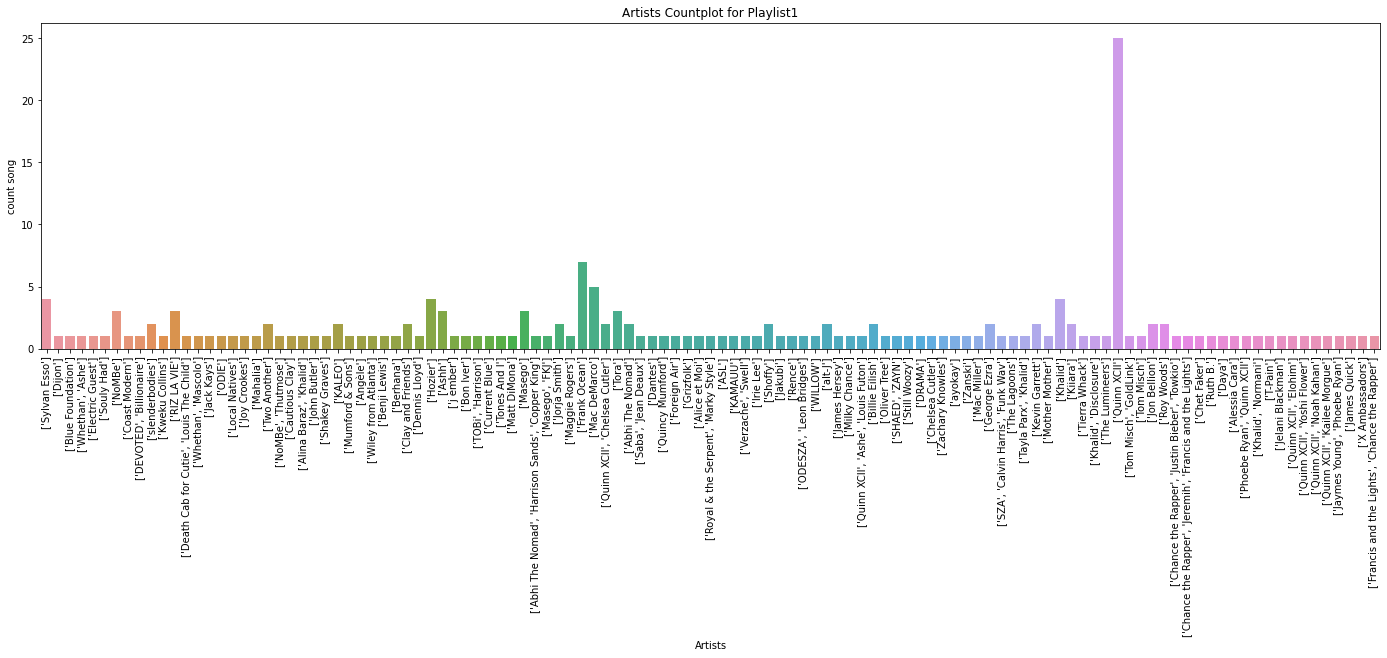

In [112]:
#Create a visualization of songs per artist for each playlist.

ax = plt.figure(figsize = (24, 6))
ax = sns.countplot(playlist1['artists'])
ax.set_title('Artists Countplot for Playlist1')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)
ax.set_ylabel('count song')
plt.show();

/Users/hinalpatel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


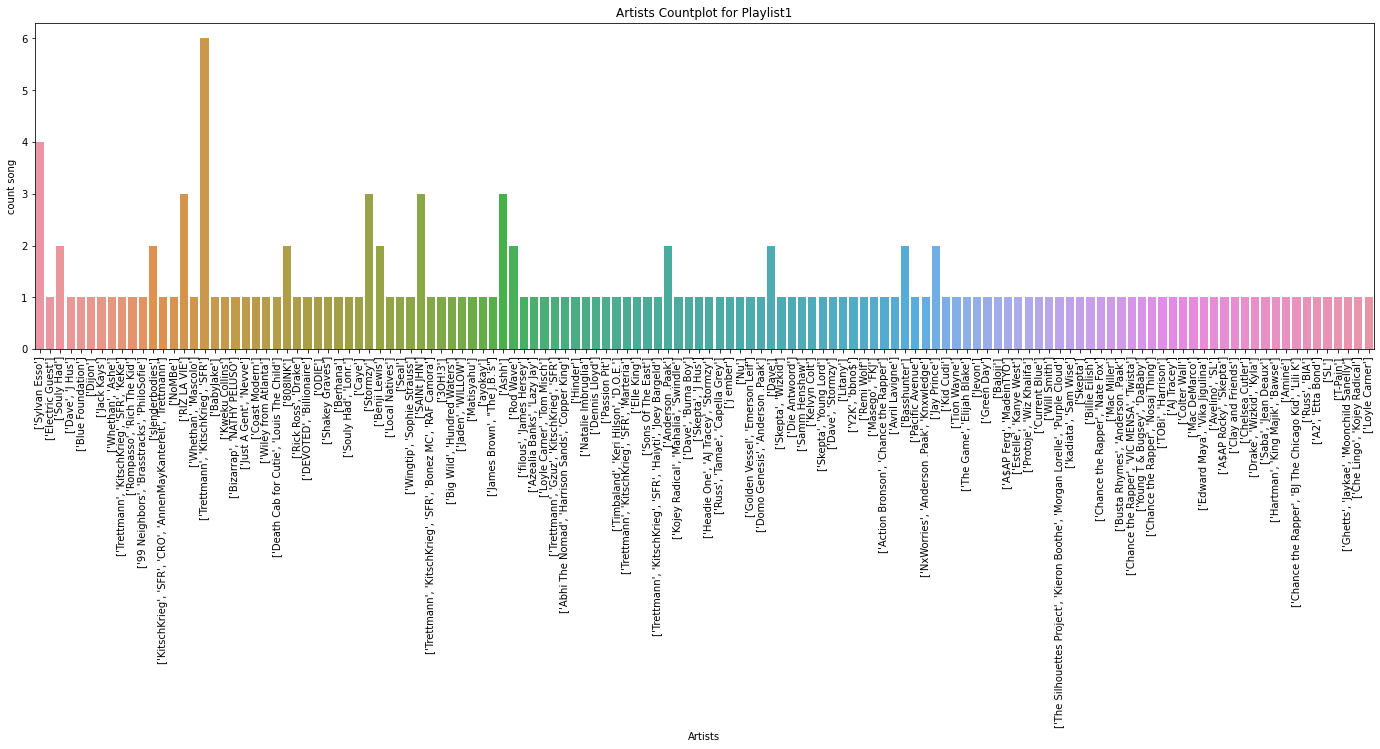

In [113]:
ax = plt.figure(figsize = (24, 6))
ax = sns.countplot(playlist2['artists'])
ax.set_title('Artists Countplot for Playlist1')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)
ax.set_ylabel('count song')
plt.show();

In [114]:
#Which artist has the most songs from different albums across both playlists?

merge_playlist = pd.concat([playlist1, playlist2], axis=0).drop_duplicates() # Merge Playlists1 and Playlists2

In [115]:
merge_data = pd.concat(g for _, g in merge_playlist.groupby("artists"))  # Groupby artists

In [116]:
merge_data.artists.value_counts()   # count the artists song

['Quinn XCII']                         25
['Frank Ocean']                         7
['RIZ LA VIE']                          6
['Trettmann', 'KitschKrieg', 'SFR']     6
['Mac DeMarco']                         5
                                       ..
['Big Wild', 'Hundred Waters']          1
['Khalid', 'Disclosure']                1
['Khalid', 'Normani']                   1
['Berhana']                             1
['3OH!3']                               1
Name: artists, Length: 209, dtype: int64

In [117]:
for val, cnt in merge_data['artists'].value_counts().sort_index(ascending=False).iteritems():  # Extract the artists by most song across both playlists 
    if cnt == playlist1['artists'].value_counts().max():
        print("The artist has the most songs in playlist1 is: ",val)
        break

The artist has the most songs in playlist1 is:  ['Quinn XCII']


In [118]:
# Calculate the Percentage of explicit column in Playlist1
playlist1['explicit_percentage_p1'] = round(((playlist1['explicit'].sum())/len(playlist1)) * 100 ,2) 
print("percentage of explicit music in Playlist1: ",explicit_percentage_p1)

percentage of explicit music in Playlist1:  17.49


<ipython-input-118-c6e5d2406202>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist1['explicit_percentage_p1'] = round(((playlist1['explicit'].sum())/len(playlist1)) * 100 ,2)


In [119]:
# Calculate the Percentage of explicit column in Playlist1

playlist2['explicit_percentage_p2']= round(((playlist2['explicit'].sum())/len(playlist2)) * 100,2) 
print("percentage of explicit music in Playlist1: ",explicit_percentage_p2)


percentage of explicit music in Playlist1:  47.74


<ipython-input-119-c012bd2685cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist2['explicit_percentage_p2']= round(((playlist2['explicit'].sum())/len(playlist2)) * 100,2)


In [120]:
#compare both explicit music's percentage and print Highest percentage

if explicit_percentage_p1 > explicit_percentage_p2:
    print("Playlist1 has a greater percentage of explicit music") 
else:
    print("Playlist2 has a greater percentage of explicit music")

Playlist2 has a greater percentage of explicit music


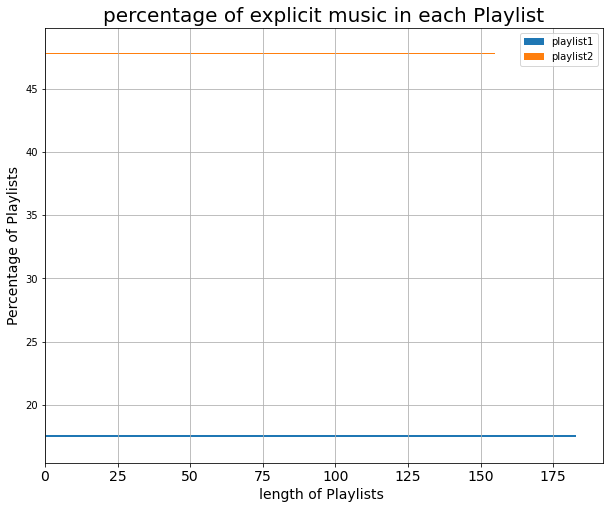

In [132]:
#Create a visualization depicting which playlist contains a greater percentage of explicit music.

fig = plt.figure(figsize=(10,8))
playlist1.explicit_percentage_p1.hist(xlabelsize=14, label = "playlist1",orientation='horizontal')
playlist2.explicit_percentage_p2.hist(xlabelsize=14, label = "playlist2",orientation='horizontal')
plt.title('percentage of explicit music in each Playlist', fontsize=20)
plt.xlabel("length of Playlists ", fontsize=14)
plt.ylabel("Percentage of Playlists", fontsize=14)
plt.legend()
plt.show()

In [67]:
#Create a visualization for the preview_url column.
playlist2

,album,artists,duration_ms,explicit,song_name,popularity,preview_url,song_duration,duration_min,explicit_percentage_p2
0,Sylvan Esso,['Sylvan Esso'],0 days 00:04:28.213000,0,Coffee,61,https://p.scdn.co/mp3-preview/f3888e1ddd1fb009...,04:28,4.470217,47.74
1,Sylvan Esso,['Sylvan Esso'],0 days 00:03:49.840000,0,Dress,45,https://p.scdn.co/mp3-preview/8394d363f25719f6...,03:49,3.830667,47.74
2,Plural,['Electric Guest'],0 days 00:03:37.586000,0,Oh Devil,56,https://p.scdn.co/mp3-preview/f2e486db3b422c91...,03:37,3.626433,47.74
3,B.L.I.S.S.,['Souly Had'],0 days 00:02:39.813000,0,Crush,57,https://p.scdn.co/mp3-preview/94782cdf03902629...,02:39,2.663550,47.74
4,PSYCHODRAMA,"['Dave', 'J Hus']",0 days 00:04:00.160000,1,Disaster (feat. J Hus),62,https://p.scdn.co/mp3-preview/bdd54d85fb12047a...,04:00,4.002667,47.74
...,...,...,...,...,...,...,...,...,...,...
194,Mozambique (feat. Jaykae & Moonchild Sanelly),"['Ghetts', 'Jaykae', 'Moonchild Sanelly']",0 days 00:04:09.680000,1,Mozambique (feat. Jaykae & Moonchild Sanelly) ...,42,https://p.scdn.co/mp3-preview/85e90aa70ce51688...,04:09,4.161333,47.74
195,CHERISH,['Jay Prince'],0 days 00:03:32.866000,1,In The Morning,46,https://p.scdn.co/mp3-preview/080be708338808cf...,03:32,3.547767,47.74
196,Dark Days (feat. Kojey Radical),"['Che Lingo', 'Kojey Radical']",0 days 00:03:02.640000,1,Dark Days (feat. Kojey Radical),0,NaN,03:02,3.044000,47.74
197,Yesterday,['Loyle Carner'],0 days 00:02:48.654000,0,Yesterday,59,https://p.scdn.co/mp3-preview/29a0727f9f380643...,02:48,2.810900,47.74
